## **Project: Investigate No Show Medical Appointment Cases in Brazil** ##

### Table of Contents ###
<ul>
<li><a href="#Business Problem">Business Problem</a></li>
<li><a href="#Data Overview">Data Overview</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#EDA">Exploratory Data Analysis</a></li>
<li><a href="#Conclusion">Conclusions</a></li>
</ul>

<a id='Business Problem'></a>
### Business Problem ###

Missing medical appointments can be disruptive for the healthcare provider, scheduled patient, potential patients in need of medical attention, and doctors.

The purpose of this report will be to analyze Brazil's patient attendance rate and determine what features may play a key role in predicting if a patient will show up to a scheduled appointment.

<a id='Data Overview'></a>
### Data Overview ###

The following dataset is comprised of information from 100,000 medical appointments in Brazil across 82 unique neighborhood hospitals. Patient characteristics including: Gender, Age, living information, certain medical conditions and disabilities are included in the dataset.

Note: Original datasource on Kaggle

### Data Wrangling ###

Loading the first row of the dataset, we can inspect and determine what needs to be cleaned. First, the Schedule and Appointment Day columns need to be converted to date time. By doing this, we can determine if there's a correlation between the amount of days a patient waits for their appointment versus if that patient will miss their appointment, the idea being a patient might feel it is no longer necessary to go to an appointment after certain amount of days have passed.

Inspecting each column, we see there are no null values and the value counts for each column are appropriate to that column. There is one instance of an unrealistic value of a patients 'Age' which is corrected.

In [1]:
# Import Packages for Data Wrangling And Visualizations
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  
import seaborn as sns

In [2]:
# Load CSV Data
path = 'noshowappointments-kagglev2-may-2016.csv'
df = pd.read_csv(path)
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Using the statistical summary of the dataframe, we can determine which features should be analyzed. A mean value of 0.5 inidicates the feature has the same number of boolean values i.e. number of 0's and 1's. This allows for an 'apples to apples' comparison of between the boolean values of one feature to another feature, and allows us to confidently make 2 conclusions rather than just 1.

For example, 'SMS received' has the highest mean value of 0.32 which indicates 32% of patients DID receive an SMS. When comparing another feature to 'SMS_received', there is enough data to confidently make a conclusion about patients who received an SMS and those who did not. The mean value for 'Handcap' is 0.022 (2.2%). An analysis of the handicap feature would only allow us to make a statistically confident conclusion about patients that ARE NOT handicapped. 

In [3]:
# View Data Info to Determine Top Metrics to Analyze
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [4]:
# Convert 'ScheduleDay' and 'AppointmentDay' columns to DateTime
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

In [5]:
# Create New Column 'WaitDays' Calculating Time Between Scheduled Day and Appointment Day
df['WaitDays'] = df['AppointmentDay']- df['ScheduledDay']
df['WaitDays'] = df['WaitDays'].dt.days

In [7]:
# Same Day Appointments Have Negative Wait Days. Convert These To 0
df['WaitDays'][df['WaitDays'] < 0]=0
df = df.query('WaitDays >= 0')

# Filter Out Any Rows with Negative Age
df = df.query('Age >= 0')
df.shape

(110526, 15)

In [8]:
# For Analysis Purposes, Boolean Values of 'No' Are Assigned A '0' Value, And 'Yes' A '1' Value.
df = df.rename(columns={"No-show":"NoShow"})
df['NoShow'] = df['NoShow'].replace({"No": '0',"Yes": '1'})

<a id='EDA'></a>
### Exploratory Data Analysis ###

#### Can no show cases be predicted by a patients age? ####
A function using groupby/value_counts and merge to create a new DataFrame of 2 comparable features was created.

Below is a relationship analysis between Age and No Shows. Similar results for all age groups.

In [9]:
# Function That Merges 2 New DataFrames Based On A 2 Defining Input Features
def merge(feature1,feature2):
    x = df.groupby(feature1)[feature2].value_counts().to_frame(name='Count').reset_index()
    
    #Create DataFrame of Patients That Showed To Their Appointments
    feature_no = x[x[feature2] =='0'].reset_index(drop=True)
    feature_no = feature_no.rename(columns={'Count':'No Count'}).drop([feature2], axis=1)

    # Create DataFrame of Patients That Missed Their Appointments
    feature_yes = x[x[feature2] =='1'].reset_index(drop=True)
    feature_yes = feature_yes.rename(columns={'Count':'Yes Count'}).drop([feature2], axis=1)

    # Merge Previous 2 DataFrames
    feature_merge = pd.merge(feature_no, feature_yes, on=feature1)

    # Create New Column Representing Proportion of Missed Appointments By Neighborhood
    feature_merge['Proportion'] = feature_merge['Yes Count']/(feature_merge['No Count'] + feature_merge['Yes Count'])
    
    return pd.DataFrame(feature_merge)

In [10]:
# Apply 'merge' Function To 'Age' And 'NoShow'
Age = merge('Age','NoShow')
Age = Age.drop(columns='Proportion')

# Bin Age's Into Groups
bins = [-1,25,50,75,100,125]
Age['Bin'] = pd.cut(Age['Age'], bins)
Age = Age.drop(['Age'],axis=1).groupby('Bin')['Yes Count','No Count'].sum().reset_index(drop=False)

# Columns Of No Show & Show Proportions
Age['No Show Proportion'] = Age['Yes Count']/(Age['Yes Count']+Age['No Count'])
Age['Show Proportion'] = Age['No Count']/(Age['Yes Count']+Age['No Count'])
Age.head()

,Bin,Yes Count,No Count,No Show Proportion,Show Proportion
0,"(-1, 25]",8818,29781,0.228452,0.771548
1,"(25, 50]",7774,28730,0.212963,0.787037
2,"(50, 75]",4857,25174,0.161733,0.838267
3,"(75, 100]",867,4513,0.161152,0.838848
4,"(100, 125]",3,2,0.600000,0.400000


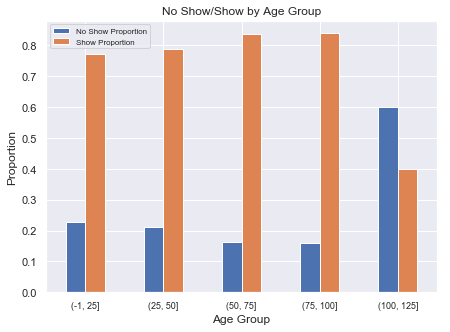

In [11]:
# Bar Graph Comparing Now Show/Show Cases by Age Group
sns.set()
Age.plot(x= "Bin", y=["No Show Proportion", "Show Proportion"], kind="bar", figsize = (7,5), title = 'No Show/Show by Age Group')
plt.ylabel('Count of No-Shows by Age');
plt.xticks(rotation=0, fontsize = 9);
plt.xlabel('Age Group')
plt.ylabel('Proportion');
plt.legend(prop={'size': 8});

#### Does the amount of time a patient has to wait for their appointment effect whether they're likely to miss it? ####
Next, an analysis of 'Wait Days' and the proportion of 'No Shows' is made. A proportion was used to help normalize the data to account for the different amount of samples for each day. The graph becomes highly variable after day 20 resulting from a lack of statistically significant number of samples. The data was filtered for all days less than 30 days and plotted. It's evident from this analysis that the percent of missed appointments increase over 15% from a 0 day wait period to 20 day wait period.

In [12]:
# No Show/Show Count Based on Number of Wait Days i.e. Days From Schedule Day To Appointment Day
WaitDays = merge('WaitDays','NoShow')
WaitDays = WaitDays.query('WaitDays > 0').reset_index(drop=True)
WaitDays.head()

,WaitDays,No Count,Yes Count,Proportion
0,1,5123,1602,0.238216
1,2,2093,644,0.235294
2,3,4059,1231,0.232703
3,4,2405,872,0.266097
4,5,3036,1001,0.247956


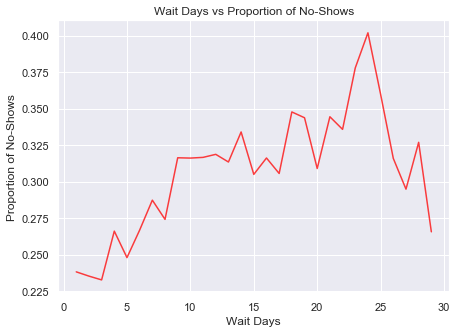

In [13]:
#Parameters For Plotting
WaitDays_filter = WaitDays.query('WaitDays < 30')
WaitDays_x = WaitDays_filter['WaitDays']
WaitDays_y = WaitDays_filter['Proportion']

# Line Plot of Wait Days vs No Show Count
sns.set(rc={'figure.figsize':(7,5)})
sns.lineplot(x = WaitDays_x, y = WaitDays_y, color = 'red', alpha = 0.75).set_title('Wait Days vs Proportion of No-Shows', fontsize = 12);
plt.ylabel('Proportion of No-Shows');
plt.xlabel('Wait Days');

#### Will sending an SMS notification of a patients scheduled appointment help hospitals reduce the percent of no show cases?####
The next analysis shows the relationship between SMS (whether the patient was notified of their appointment) to the proportion of no-show cases. It'd be reasonable to hypothesize a positive correlation between these two factors, however the data suggest's otherwise. Eventhough patients were notified of their appointments, they still missed their appointments. 16.7% of patients who were not notified missed their appointment compared to 27.5% of patients that missed their appointments when notified by SMS.

In [14]:
# No Show/Show Count Based On SMS Notification
SMS = merge('SMS_received','NoShow')
SMS.head()

,SMS_received,No Count,Yes Count,Proportion
0,0,62509,12535,0.167035
1,1,25698,9784,0.275745


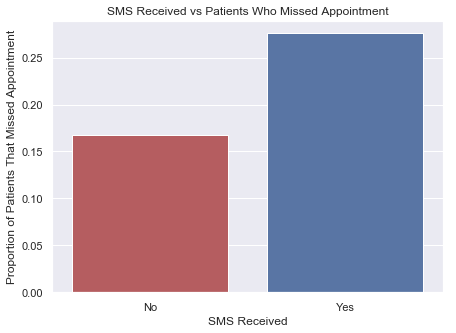

In [15]:
#Parameters for plotting
SMS_x = SMS['SMS_received']
SMS_y = SMS['Proportion']

#Bar Plot Comparing Percentage of Patients That Missed Appointment Based On Them Receiving Notification via SMS
sns.barplot(x = SMS_x, y = SMS_y, palette=["C3", "C0"]).set_title('SMS Received vs Patients Who Missed Appointment');
plt.xticks(np.arange(2), ('No','Yes'));
plt.xlabel('SMS Received');
plt.ylabel('Proportion of Patients That Missed Appointment');

#### Which neighborhoods have the highest percentage of no-show cases?####
Below shows which Neighborhoods have the highest count of missed appointments. On Average, 19.8% of appointments are a no-show for hospitals in Brazil, with hospitals in Neighborhoods such as Santos Dumont, Santa Clara, Santa Cecilia, Itarare all having no show rates of over 25%. The plot shows the top 25% of neighborhoods with the highest rate of no-show cases.

In [16]:
# New DataFrame Showing Show And No Show Count by Neighborhood
Neighborhood = merge('Neighbourhood','NoShow')
Neighborhood.head()

# View Statistics
Neighborhood.describe()

,No Count,Yes Count,Proportion
count,79.000000,79.000000,79.000000
mean,1116.531646,282.493671,0.197970
std,1096.101084,277.991324,0.031694
min,7.000000,1.000000,0.085714
25%,328.500000,81.500000,0.180276
50%,710.000000,190.000000,0.197588
75%,1648.000000,428.500000,0.216972
max,6252.000000,1465.000000,0.289185


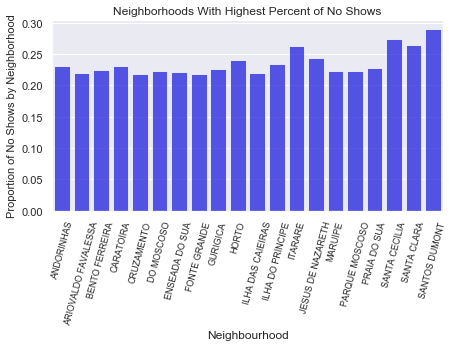

In [17]:
# Look At Neighborhood Hospitals With Top 25% Missed Appointment Rate
High_noshow = Neighborhood.query('Proportion > 0.216972')

# Parameters For Plotting
neighbourhood_x = High_noshow['Neighbourhood']
neighbourhood_y = High_noshow['Proportion']

# Bar Plot of Neighborhood Hospitals With Top 25% of No Shows
plt.figure(figsize=(7,3.5))
sns.barplot(x = neighbourhood_x, y = neighbourhood_y, color = 'blue', alpha = 0.75).set_title('Neighborhoods With Highest Percent of No Shows', fontsize = 12);
plt.xticks(rotation=75, fontsize = 9);
plt.ylabel('Proportion of No Shows by Neighborhood', fontsize = 11);

plt.show()

#### Why do these Neighborhoods have the highest percentage of no show cases? ####
The final analysis attempts to determine what factor could cause these specific Neighborhood hospitals to have such a high rate of no-show cases. One possible explanation could be socioeconomic conditions of these Neighborhoods. The top 20 neighborhoods with the highest proportion of Brazil's welfare program (Bolsa Familia) is listed below. This list is compared to the list of the top 20 neighborhoods with the highest no-show cases. Of the top 20 neighborhoods with the highest proportion of welfare recipients, 8 of those neighborhoods also experience the highest case of no-show cases. Further analysis from regression plotting shows no correlation between these 2 factors.

In [18]:
# Analyze Relationship Between Scholarship Recipient (Bolsa Familia) And No Show Rate
df['Scholarship'] = df['Scholarship'].astype(str)
S = merge("Neighbourhood","Scholarship")

# Top 20 Neighborhoods With Highest Proportion of Welfare Recipient
S_20 = S.sort_values(by='Proportion', ascending = False).reset_index(drop=True).head(20)
S_20.head()

,Neighbourhood,No Count,Yes Count,Proportion
0,SÃO BENEDITO,1035,404,0.280751
1,DO MOSCOSO,302,111,0.268765
2,ILHA DO PRÍNCIPE,1687,579,0.255516
3,PIEDADE,337,115,0.254425
4,SANTOS REIS,427,120,0.219378


In [19]:
# Compare Neighborhoods That Have Highest Proportion of Welfare Recipient With Highest Proportion of No Shows
neigh = High_noshow.sort_values(by = 'Proportion',ascending = False)
neigh = neigh.head(20)
N_filter = neigh['Neighbourhood']

# Number of Neighbhorhoods With Highest Rate of No Shows AND Highest Rate of Welfare Recipient
neigh_schol = S_20[S_20['Neighbourhood'].isin(N_filter)]
neigh_schol.shape

(8, 4)

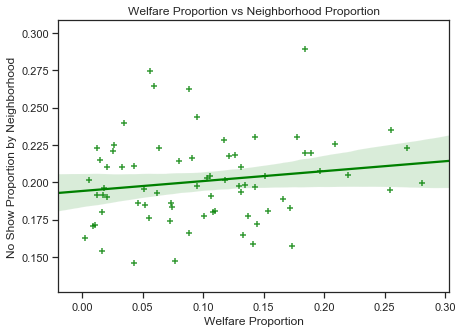

In [21]:
# Welfare Recipient Proportion By Neighborhood
Proportion_Welfare = S
Proportion_Welfare = Proportion_Welfare.rename(columns={'Proportion':'Welfare Proportion'})

# No Show Proportion By Neighborhood
Proportion_Neighborhood = Neighborhood
Proportion_Neighborhood = Proportion_Neighborhood.rename(columns={'Proportion':'Neighborhood Proportion'})

# Merge Above DataFrames
Proportion_merge = pd.merge(Proportion_Welfare,Proportion_Neighborhood, on = 'Neighbourhood')

# Parameters For Plotting
corr_x = Proportion_merge['Welfare Proportion']
corr_y = Proportion_merge['Neighborhood Proportion']

# Regression Plot
sns.regplot(x = corr_x, y = corr_y, color ='green',marker = '+').set_title('Welfare Proportion vs Neighborhood Proportion')
sns.set_style('ticks')
plt.xlabel('Welfare Proportion')
plt.ylabel('No Show Proportion by Neighborhood');

<a id='Conclusion'></a>
### Conclusion ###

From the analysis of this dataset, some conclusions can be made regarding what factors contribute to higher cases of no-show medical appointments in Brazil. Due to the distribution of values for certain factors, the analysis relies on proportion/percent of no show cases rather than count. 

First, there's no true correlation between certain age groups and the propensity to miss an appointment. Although the age group of 100-125 yr old shows a higher percent of no show cases, its important to note their are only 5 total data points in the bin.

A relationship can be drawn regarding the amount of days patients must wait to their appointment and the proportion of no shows. There is a positive correlation for the first 20 days i.e. the more days a patient has to wait for an appointment, the higher chance there is of them missing the scheduled appointment. After day 20, the graph becomes volatile so no clear conclusion can be made due to lack of data.

The relationship between SMS (whether the patient was notified of their appointment) to the proportion of no-show cases was also analyzed. Eventhough patients were notified of their appointments, they still missed their appointments. 16.7% of patients who were not notified missed their appointment compared to 27.5% of patients that missed their appointments when notified by SMS. Although SMS notifications don't help prevent no-shows, it's still good practice for hospitals to send patients reminders.

On Average, 19.8% of appointments are a no-show for hospitals in Brazil, with hospitals in Neighborhoods such as Santos Dumont, Santa Clara, Santa Cecilia, Itarare all having no show rates of over 25%. The top 20 neighborhoods with the highest proportion of Brazil's welfare program (Bolsa Familia) is compared to the list of the top 20 neighborhoods with the highest no-show cases. Of the top 20 neighborhoods with the highest proportion of welfare recipients, 8 of those neighborhoods also experience the highest case of no-show cases. Further analysis of the full datasets, show a minimal/slightly positive correlation between these 2 factors. 

#### Credit Sources ####
1. StackOverflow